<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/classification/List6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from google.colab import files
# files.upload()

!pip install -q kaggle
!mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
!cp '/content/drive/MyDrive/Colab Notebooks/secrets/kaggle.json' ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [84]:
!kaggle datasets download -d prathamtripathi/drug-classification
!kaggle datasets download -d uciml/pima-indians-diabetes-database

!mkdir dataset

!unzip -o -q /content/drug-classification.zip -d /content/dataset

!unzip -o -q /content/pima-indians-diabetes-database.zip -d /content/dataset

drug-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘dataset’: File exists


In [85]:
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans, MeanShift
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier

In [86]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [87]:
iris = datasets.load_iris(as_frame=True)
wine = datasets.load_wine(as_frame=True)
drug = pd.read_csv("/content/dataset/drug200.csv", sep=",", header=0)


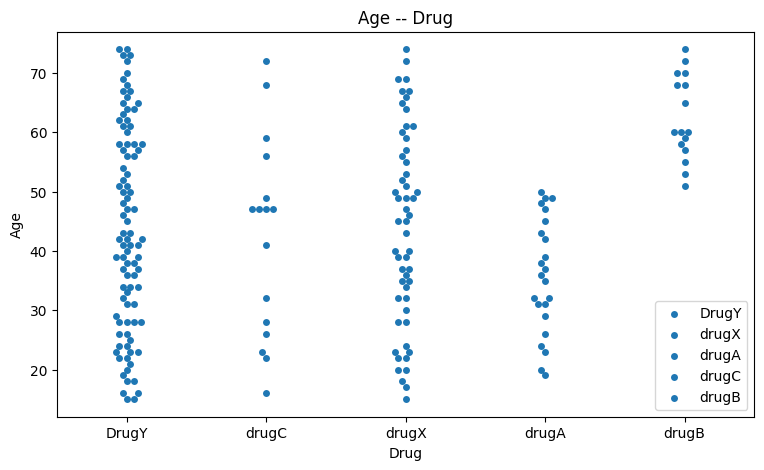

In [88]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = drug)
plt.legend(drug.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()

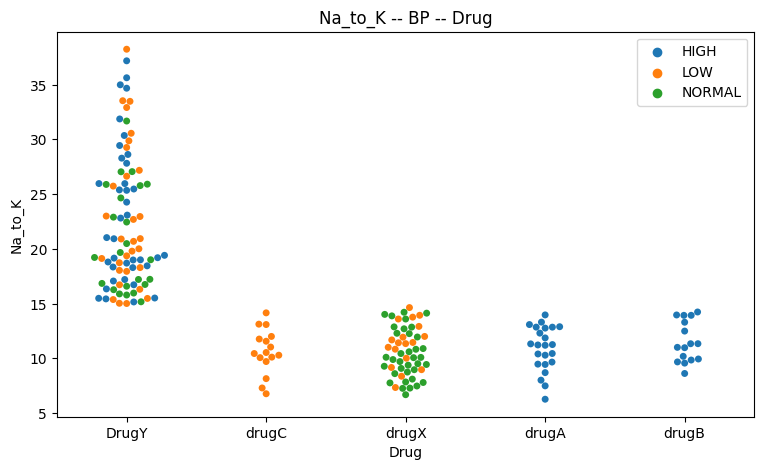

In [89]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = drug)
plt.legend()
plt.title("Na_to_K -- BP -- Drug")
plt.show()

In [90]:
drug = pd.read_csv("/content/dataset/drug200.csv", sep=",", header=0)

drug.rename(columns={
    'Age': 'age', 
    'Sex': 'sex', 
    'BP': 'pb', 
    'Cholesterol': 
    'cholesterol',
    'Na_to_K':'na_to_k_ratio', 
    'Drug': 'target'},
    inplace=True
    )

drug['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in drug.na_to_k_ratio]

drug_target = drug.target

drug.drop(['target'], axis=1, inplace=True)


In [91]:
target_label_encoder = LabelEncoder()

target_label_encoder.fit(drug_target)

drug_target_labels = target_label_encoder.classes_

print(drug_target_labels)

drug_target = target_label_encoder.transform(drug_target)


# print(drug.shape)
# temp = drug_target.reshape(-1, 1)
# sns.pairplot(drug, hue=temp.any())

['DrugY' 'drugA' 'drugB' 'drugC' 'drugX']


In [92]:
label_encoder = LabelEncoder()

drug['sex'] = label_encoder.fit_transform(drug['sex'])
drug['pb'] = label_encoder.fit_transform(drug['pb'])
drug['cholesterol'] = label_encoder.fit_transform(drug['cholesterol'])


In [93]:
lda_pipeline = Pipeline(
    [
      ('scaler', StandardScaler()),
      ('lda_dim_reduction', LDA(n_components=2)),
    ]
)

# Zad 1

## Iris

In [94]:
iris_lda = pd.DataFrame(data=lda_pipeline.fit_transform(iris.data, iris.target), columns=['lda1', 'lda2'])

<Axes: xlabel='lda1', ylabel='lda2'>

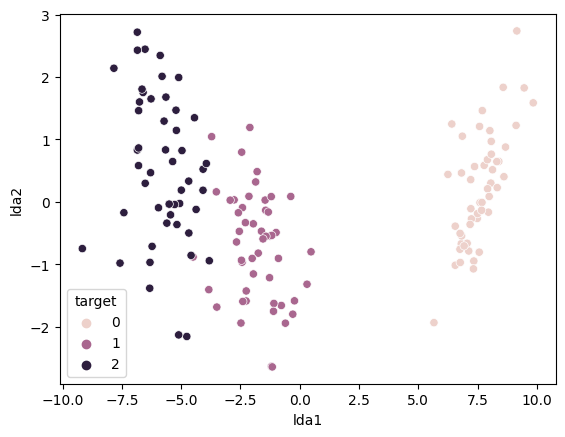

In [95]:
sns.scatterplot(data=iris_lda, x='lda1', y='lda2', hue=iris.target)

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_lda, iris.target, test_size=0.33)

In [97]:
# param_grid = {'n_neighbors': np.arange(3, 6)}

# knn_cv = GridSearchCV(knn, param_grid, cv=5)

# knn_cv.fit(X_train, Y_train)

In [98]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, Y_train)

Y_predict = knn.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = knn.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



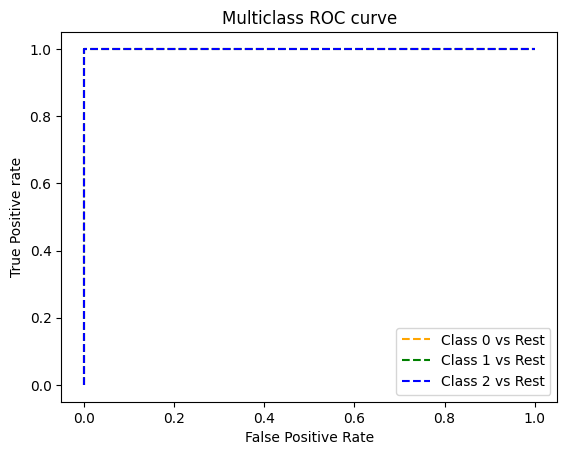

In [99]:
knn_ovr = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))

knn_ovr.fit(X_train, Y_train)

Y_predict = knn_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = knn_ovr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(iris.target.unique())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [100]:
svc = SVC(gamma='auto', probability=True)

svc.fit(X_train, Y_train)

Y_predict = svc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))


Y_proba_predict = svc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



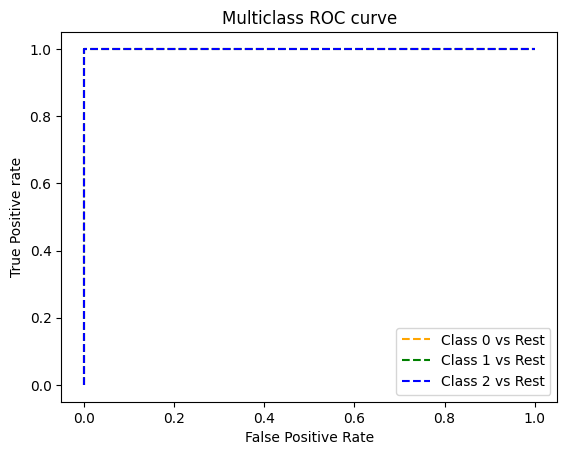

In [101]:
svc_ovr = OneVsRestClassifier(SVC(gamma='auto', probability=True))

svc_ovr.fit(X_train, Y_train)

Y_predict = svc_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = svc_ovr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(iris.target.unique())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [102]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)

Y_predict = dtc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))


Y_proba_predict = dtc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.91      1.00      0.95        21
           2       1.00      0.88      0.93        16

    accuracy                           0.96        50
   macro avg       0.97      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [109]:
# dtc_ovr = OneVsRestClassifier(DecisionTreeClassifier())

# dtc_ovr.fit(X_train, Y_train)

# Y_predict = dtc_ovr.predict(X_test)

# conf_matrix = confusion_matrix(Y_test, Y_predict)

# # disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# # disp.plot()

# f1 = f1_score(Y_test, Y_predict, average='micro')

# print(classification_report(Y_test, Y_predict))

# Y_proba_predict = dtc_ovr.predict_proba(X_test)


# print(Y_proba_predict.shape)
# print(Y_test.shape)

# indexList = [np.any(i) for i in np.isnan(Y_proba_predict)]
# print(len(indexList))

# Y_proba_predict = np.delete(Y_proba_predict, indexList, axis=0)
# Y_test = np.delete(Y_test, indexList, axis=0)

# # roc curve for classes
# fpr = {}
# tpr = {}
# thresh ={}

# n_class = len(iris.target.unique())

# for i in range(n_class):    
#     fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

#     # plotting    
# plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
# plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
# plt.title('Multiclass ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive rate')
# plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300);

## Wine


In [110]:
wine_lda = pd.DataFrame(data=lda_pipeline.fit_transform(wine.data, wine.target), columns=['lda1', 'lda2'])

<Axes: xlabel='lda1', ylabel='lda2'>

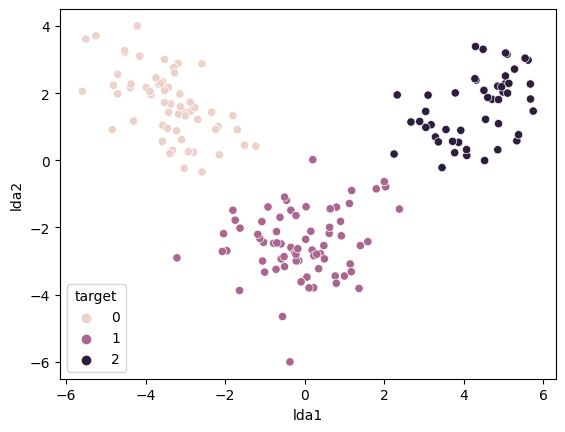

In [111]:
sns.scatterplot(data=wine_lda, x='lda1', y='lda2', hue=wine.target)

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_lda, wine.target, test_size=0.33)

In [113]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

Y_predict = knn.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))


Y_proba_predict = knn.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        14

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        14

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



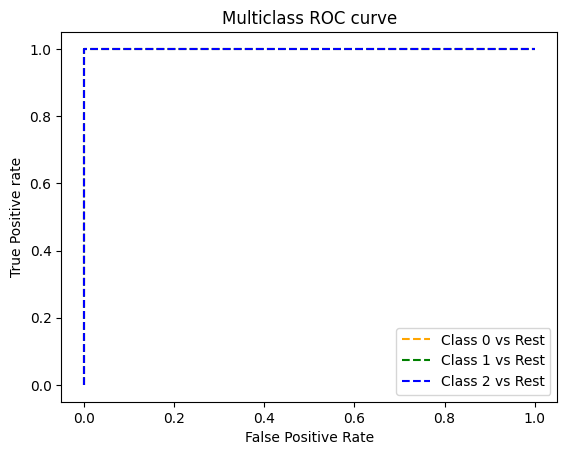

In [114]:
knn_ovr = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))

knn_ovr.fit(X_train, Y_train)

Y_predict = knn_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = knn_ovr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(wine.target.unique())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [115]:
svc = SVC(gamma='auto', probability=True)

svc.fit(X_train, Y_train)

Y_predict = svc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))


Y_proba_predict = svc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        14

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        14

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



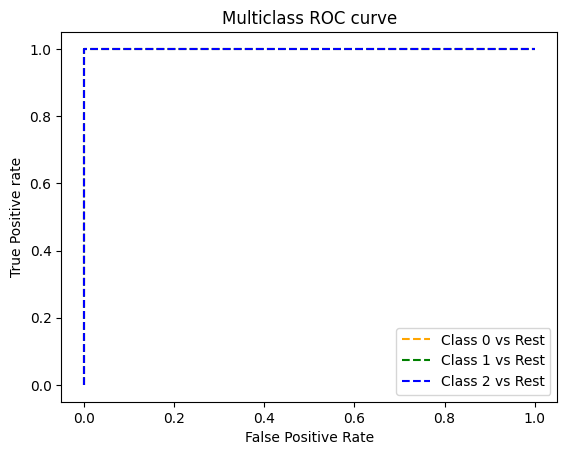

In [116]:
svc_ovr = OneVsRestClassifier(SVC(gamma='auto', probability=True))

svc_ovr.fit(X_train, Y_train)

Y_predict = svc_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = svc_ovr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(wine.target.unique())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [117]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)

Y_predict = dtc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))


Y_proba_predict = dtc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        14

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.91      1.00      0.95        20
           2       1.00      1.00      1.00        14

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



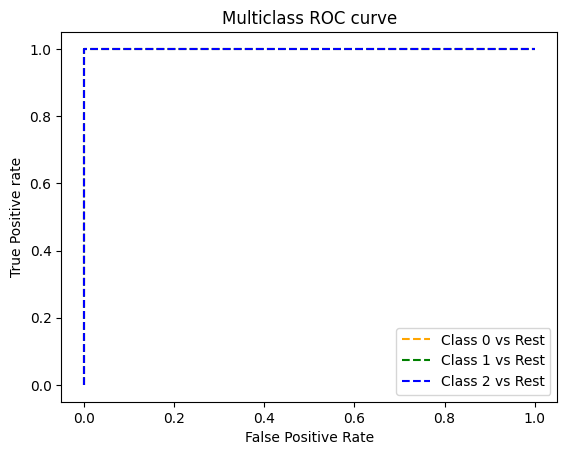

In [118]:
dtc_ovr = OneVsRestClassifier(DecisionTreeClassifier())

dtc_ovr.fit(X_train, Y_train)

Y_predict = dtc_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = dtc_ovr.predict_proba(X_test)


# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(wine.target.unique())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

## Drug

<Axes: >

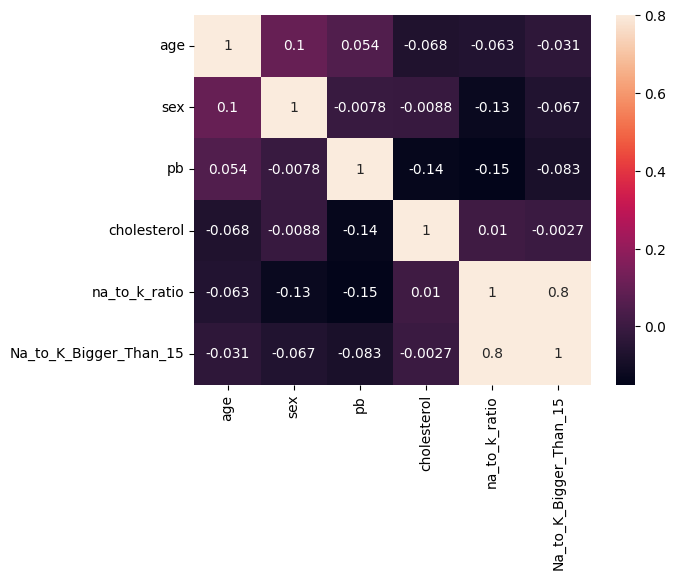

In [119]:
sns.heatmap(drug.corr(),vmax=0.8, annot= True)

In [120]:
drug.shape

(200, 6)

In [121]:
pca_pipeline = Pipeline(
    [
      ('scaler', StandardScaler()),
      ('pca_dim_reduction', PCA(n_components=2)),
    ]
)

In [122]:
drug_pca = pd.DataFrame(data=pca_pipeline.fit_transform(drug, drug_target), columns=['pca1', 'pca2'])

<Axes: xlabel='pca1', ylabel='pca2'>

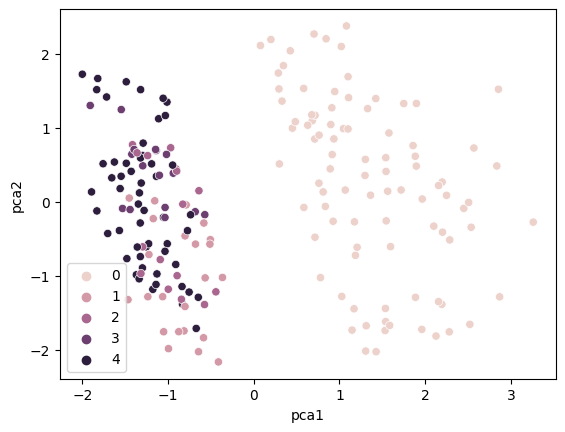

In [123]:
sns.scatterplot(data=drug_pca, x='pca1', y='pca2', hue=drug_target)

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(drug_pca, drug_target, test_size=0.33)

In [125]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

Y_predict = knn.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))


Y_proba_predict = knn.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.44      0.44      0.44         9
           2       0.00      0.00      0.00         3
           3       0.50      0.20      0.29         5
           4       0.55      0.69      0.61        16

    accuracy                           0.74        66
   macro avg       0.50      0.47      0.47        66
weighted avg       0.73      0.74      0.73        66



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.33      0.50         9
           2       0.00      0.00      0.00         3
           3       0.50      0.20      0.29         5
           4       0.54      0.88      0.67        16

    accuracy                           0.77        66
   macro avg       0.61      0.48      0.49        66
weighted avg       0.80      0.77      0.75        66



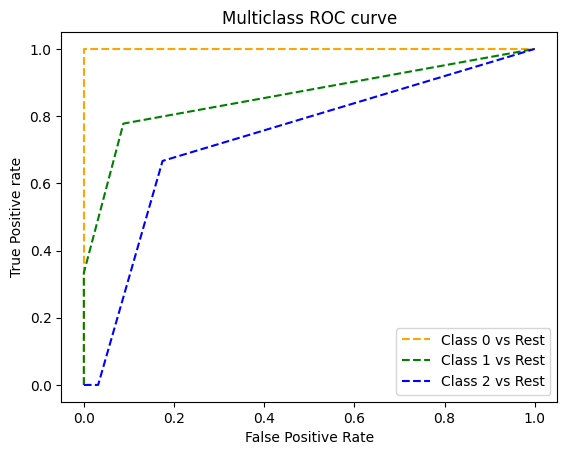

In [126]:
knn_ovr = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))

knn_ovr.fit(X_train, Y_train)

Y_predict = knn_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = knn_ovr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(np.unique(drug_target))

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [127]:
svc = SVC(gamma='auto', probability=True)

svc.fit(X_train, Y_train)

Y_predict = svc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))


Y_proba_predict = svc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.60      0.33      0.43         9
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5
           4       0.54      0.94      0.68        16

    accuracy                           0.77        66
   macro avg       0.43      0.45      0.42        66
weighted avg       0.71      0.77      0.72        66



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.50      0.22      0.31         9
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5
           4       0.52      0.94      0.67        16

    accuracy                           0.76        66
   macro avg       0.40      0.43      0.39        66
weighted avg       0.69      0.76      0.70        66



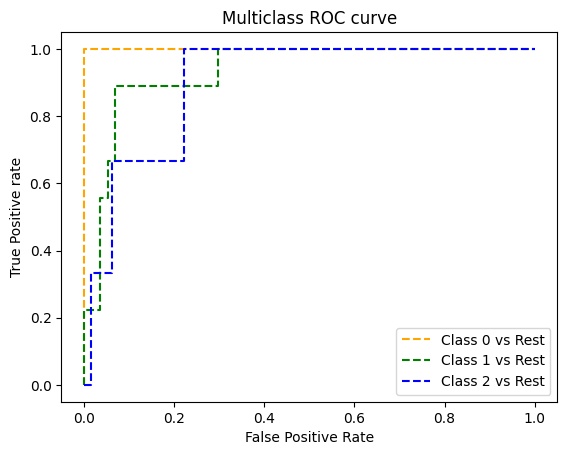

In [128]:
svc_ovr = OneVsRestClassifier(SVC(gamma='auto', probability=True))

svc_ovr.fit(X_train, Y_train)

Y_predict = svc_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = svc_ovr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(np.unique(drug_target))

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [129]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)

Y_predict = dtc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))


Y_proba_predict = dtc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.22      0.36         9
           2       0.29      0.67      0.40         3
           3       0.12      0.20      0.15         5
           4       0.50      0.50      0.50        16

    accuracy                           0.70        66
   macro avg       0.58      0.52      0.48        66
weighted avg       0.78      0.70      0.70        66



In [151]:
# dtc_ovr = OneVsRestClassifier(DecisionTreeClassifier())

# dtc_ovr.fit(X_train, Y_train)

# Y_predict = dtc_ovr.predict(X_test)

# conf_matrix = confusion_matrix(Y_test, Y_predict)

# # disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# # disp.plot()

# f1 = f1_score(Y_test, Y_predict, average='micro')

# print(classification_report(Y_test, Y_predict))

# Y_proba_predict = dtc_ovr.predict_proba(X_test)

# indexList = [np.any(i) for i in np.isnan(Y_proba_predict)]
# Y_proba_predict = np.delete(Y_proba_predict, indexList, axis=0)



# # roc curve for classes
# fpr = {}
# tpr = {}
# thresh ={}

# n_class = len(np.unique(drug_target))

# for i in range(n_class):    
#     fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

#     # plotting    
# plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
# plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
# plt.title('Multiclass ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive rate')
# plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300);

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.50      0.22      0.31         9
           2       0.00      0.00      0.00         3
           3       0.67      0.40      0.50         5
           4       0.54      0.81      0.65        16

    accuracy                           0.74        66
   macro avg       0.54      0.48      0.49        66
weighted avg       0.75      0.74      0.73        66



/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:492: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


ValueError: ignored

# Zad 2

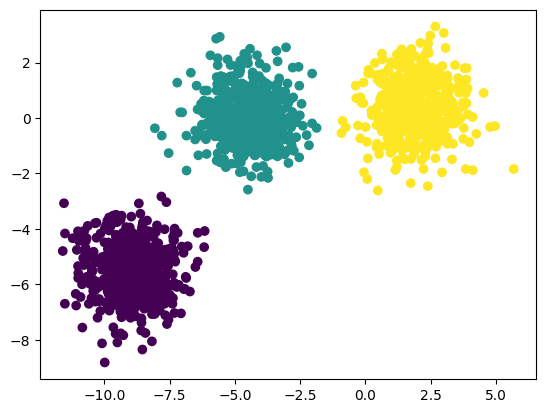

In [131]:
n_samples = 1500
random_state = 170


X, y = make_blobs(n_samples=n_samples, random_state=random_state)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

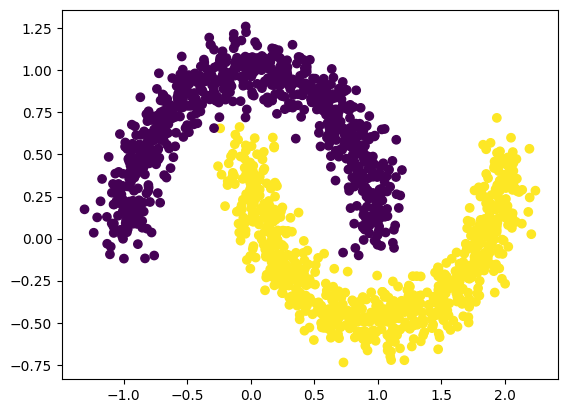

In [132]:
n_samples = 1500

X_moon, y_moon = make_moons(n_samples=n_samples, noise=0.1)

plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon)
plt.show()

## Blob


In [133]:
# spectral clustering


In [134]:
random_state = 170

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

Silhouette Coefficient for KMeans: 0.7333423486262539
Calinski-Harabasz Index for KMeans: 10633.868943793219
Rand index for KMeans: 1.0
Homogeneity for KMeans: 1.0
Mutual Information for KMeans: 1.09861228866811


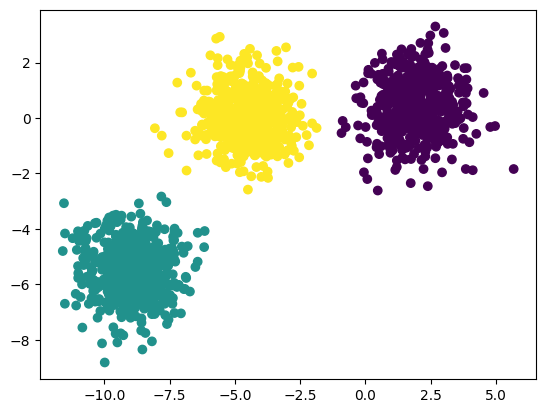

In [135]:
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

print(f'Silhouette Coefficient for KMeans: {silhouette_score(X, y_pred)}')
print(f'Calinski-Harabasz Index for KMeans: {calinski_harabasz_score(X, y_pred)}')
print(f'Rand index for KMeans: {rand_score(y, y_pred)}')
print(f'Homogeneity for KMeans: {homogeneity_score(y, y_pred)}')
print(f'Mutual Information for KMeans: {mutual_info_score(y, y_pred)}')

Silhouette Coefficient for MeanShift: 0.7333423486262539
Calinski-Harabasz Index for MeanShift: 10633.868943793219
Rand index for MeanShift: 1.0
Homogeneity for MeanShift: 1.0
Mutual Information for MeanShift: 1.09861228866811


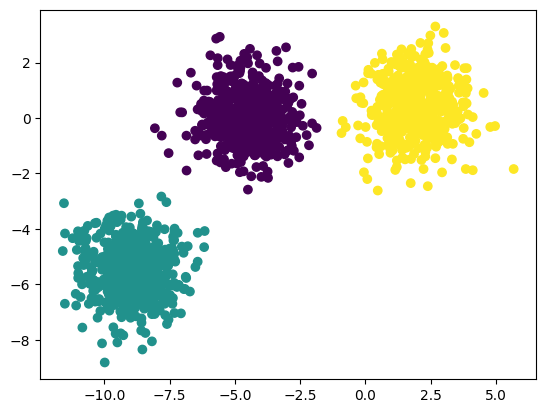

In [136]:
y_m_pred = MeanShift().fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_m_pred)

print(f'Silhouette Coefficient for MeanShift: {silhouette_score(X, y_m_pred)}')
print(f'Calinski-Harabasz Index for MeanShift: {calinski_harabasz_score(X, y_m_pred)}')
print(f'Rand index for MeanShift: {rand_score(y, y_m_pred)}')
print(f'Homogeneity for MeanShift: {homogeneity_score(y, y_m_pred)}')
print(f'Mutual Information for MeanShift: {mutual_info_score(y, y_m_pred)}')

Silhouette Coefficient for MeanShift: 0.7333423486262539
Calinski-Harabasz Index for MeanShift: 10633.868943793219
Rand index for MeanShift: 1.0
Homogeneity for MeanShift: 1.0
Mutual Information for MeanShift: 1.09861228866811


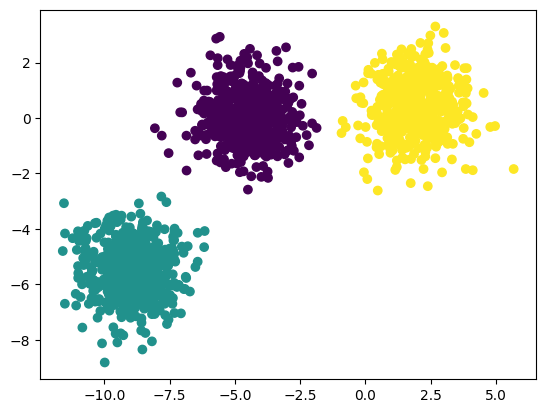

In [137]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3)

y_spec_predict = spectral.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_m_pred)

print(f'Silhouette Coefficient for MeanShift: {silhouette_score(X, y_spec_predict)}')
print(f'Calinski-Harabasz Index for MeanShift: {calinski_harabasz_score(X, y_spec_predict)}')
print(f'Rand index for MeanShift: {rand_score(y, y_spec_predict)}')
print(f'Homogeneity for MeanShift: {homogeneity_score(y, y_spec_predict)}')
print(f'Mutual Information for MeanShift: {mutual_info_score(y, y_spec_predict)}')

## Moon

In [138]:
# X_moon, y_moon

random_state = 170

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

Silhouette Coefficient for KMeans: 0.4867518289714318
Calinski-Harabasz Index for KMeans: 2204.7600983631296
Rand index for KMeans: 0.6287845230153436
Homogeneity for KMeans: 0.19512751600381026
Mutual Information for KMeans: 0.1352520875677067


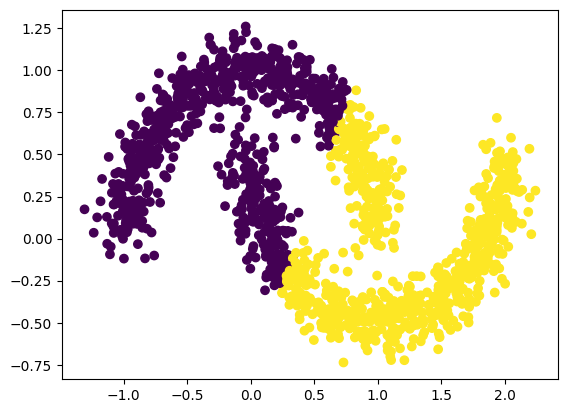

In [139]:
y_moon_pred = KMeans(n_clusters=2, **common_params).fit_predict(X_moon)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon_pred)

print(f'Silhouette Coefficient for KMeans: {silhouette_score(X_moon, y_moon_pred)}')
print(f'Calinski-Harabasz Index for KMeans: {calinski_harabasz_score(X_moon, y_moon_pred)}')
print(f'Rand index for KMeans: {rand_score(y_moon, y_moon_pred)}')
print(f'Homogeneity for KMeans: {homogeneity_score(y_moon, y_moon_pred)}')
print(f'Mutual Information for KMeans: {mutual_info_score(y_moon, y_moon_pred)}')

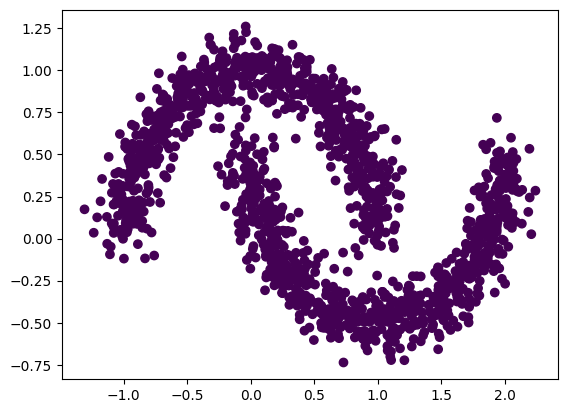

In [140]:
y_moon_m_pred = MeanShift().fit_predict(X_moon)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon_m_pred)

# print(f'Silhouette Coefficient for MeanShift: {silhouette_score(X_moon, y_moon_m_pred)}')
# print(f'Calinski-Harabasz Index for MeanShift: {calinski_harabasz_score(X_moon, y_moon_m_pred)}')
# print(f'Rand index for MeanShift: {rand_score(y_moon_m, y_moon_m_pred)}')
# print(f'Homogeneity for MeanShift: {homogeneity_score(y_moon_m, y_moon_m_pred)}')
# print(f'Mutual Information for MeanShift: {mutual_info_score(y_moon_m, y_moon_m_pred)}')

Silhouette Coefficient for SpectralClustering: 0.4877222932056846
Calinski-Harabasz Index for SpectralClustering: 2197.690883014107
Rand index for SpectralClustering: 0.6434102735156771
Homogeneity for SpectralClustering: 0.2185515975433369
Mutual Information for SpectralClustering: 0.15148842364403586


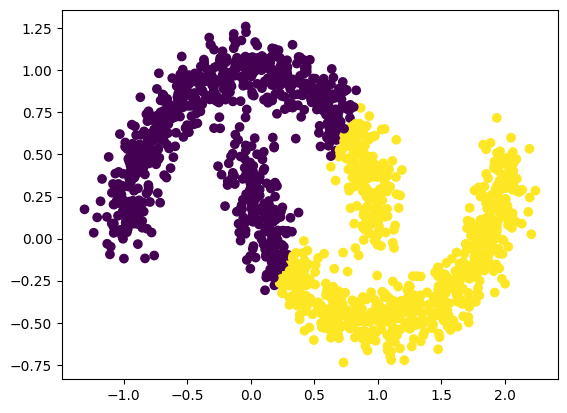

In [141]:
spectral = SpectralClustering(n_clusters=2)

y_spec_predict = spectral.fit_predict(X_moon)

plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_spec_predict)

print(f'Silhouette Coefficient for SpectralClustering: {silhouette_score(X_moon, y_spec_predict)}')
print(f'Calinski-Harabasz Index for SpectralClustering: {calinski_harabasz_score(X_moon, y_spec_predict)}')
print(f'Rand index for SpectralClustering: {rand_score(y_moon, y_spec_predict)}')
print(f'Homogeneity for SpectralClustering: {homogeneity_score(y_moon, y_spec_predict)}')
print(f'Mutual Information for SpectralClustering: {mutual_info_score(y_moon, y_spec_predict)}')

# Zad 3


In [142]:
diabetes = pd.read_csv('/content/dataset/diabetes.csv', delimiter=',')
print(diabetes.head())


diabetes_target = diabetes.Outcome

diabetes.drop(['Outcome'], inplace=True, axis=1)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [143]:
x_train, x_test, y_train, y_test = train_test_split(diabetes, diabetes_target, test_size = 0.5, random_state=50)

In [144]:
svc_classifier = SVC()

svc_classifier.fit(x_train, y_train)

y_predict = svc_classifier.predict(x_test)

In [145]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))

confusion = pd.DataFrame(cm, index=['Diabetic', 'Not Diabetic'], columns=['Predicted Diabetes', 'Predicted Healthy'])
confusion

,Predicted Diabetes,Predicted Healthy
Diabetic,226,22
Not Diabetic,75,61


<Axes: >

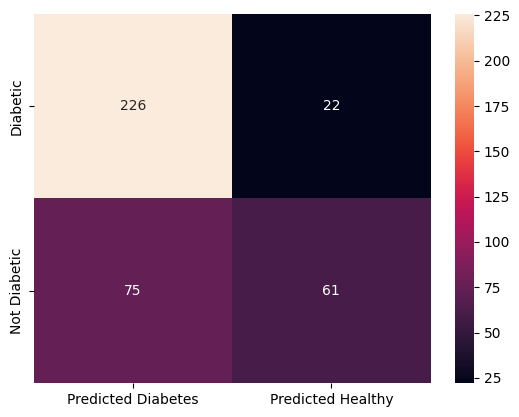

In [146]:
sns.heatmap(confusion,annot=True,fmt='g')


In [147]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.75      0.91      0.82       248
           1       0.73      0.45      0.56       136

    accuracy                           0.75       384
   macro avg       0.74      0.68      0.69       384
weighted avg       0.75      0.75      0.73       384

